<a href="https://colab.research.google.com/github/Vikkypedia/Data-Science-Bootcamp/blob/main/Data_Science_Bootcamp_Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Q1.
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)


In [10]:
print(df.columns)
df.head(10)


Index(['hour_beginning', 'location', 'Pedestrians', 'Towards Manhattan',
       'Towards Brooklyn', 'weather_summary', 'temperature', 'precipitation',
       'lat', 'long', 'events', 'Location1', 'DayOfWeek'],
      dtype='object')


,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,DayOfWeek
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday
5,2019-12-25 14:00:00,Brooklyn Bridge,3171,1685,1486,clear-day,44.0,0.0000,40.708164,-73.999509,Christmas Day,"(40.7081639691088, -73.9995087014816)",Wednesday
6,2019-01-27 21:00:00,Brooklyn Bridge,13,5,8,partly-cloudy-night,41.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Sunday
7,2019-02-07 04:00:00,Brooklyn Bridge,0,0,0,cloudy,39.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Thursday
8,2019-01-03 21:00:00,Brooklyn Bridge,9,7,2,partly-cloudy-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Thursday
9,2019-08-13 09:00:00,Brooklyn Bridge,520,281,239,partly-cloudy-day,76.0,0.0087,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday


In [16]:
# Convert 'hour_beginning' to datetime format
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

# Extract day names (like 'Monday', 'Tuesday') from the 'hour_beginning' column
df['DayOfWeek'] = df['hour_beginning'].dt.day_name()

# Filter out Saturday and Sunday
df_weekdays = df[~df['DayOfWeek'].isin(['Saturday', 'Sunday'])]

# Display the first few rows of the filtered dataframe
print(df_weekdays.head(10))


        hour_beginning         location  Pedestrians  Towards Manhattan  \
0  2019-04-30 00:00:00  Brooklyn Bridge            3                  3   
1  2019-12-31 22:00:00  Brooklyn Bridge           10                  9   
2  2019-12-31 23:00:00  Brooklyn Bridge            2                  0   
3  2019-12-31 21:00:00  Brooklyn Bridge           12                  0   
4  2019-04-01 03:00:00  Brooklyn Bridge            1                  0   
5  2019-12-25 14:00:00  Brooklyn Bridge         3171               1685   
7  2019-02-07 04:00:00  Brooklyn Bridge            0                  0   
8  2019-01-03 21:00:00  Brooklyn Bridge            9                  7   
9  2019-08-13 09:00:00  Brooklyn Bridge          520                281   
11 2019-11-04 06:00:00  Brooklyn Bridge          125                 66   

    Towards Brooklyn      weather_summary  temperature  precipitation  \
0                  0                  NaN          NaN            NaN   
1                  1        

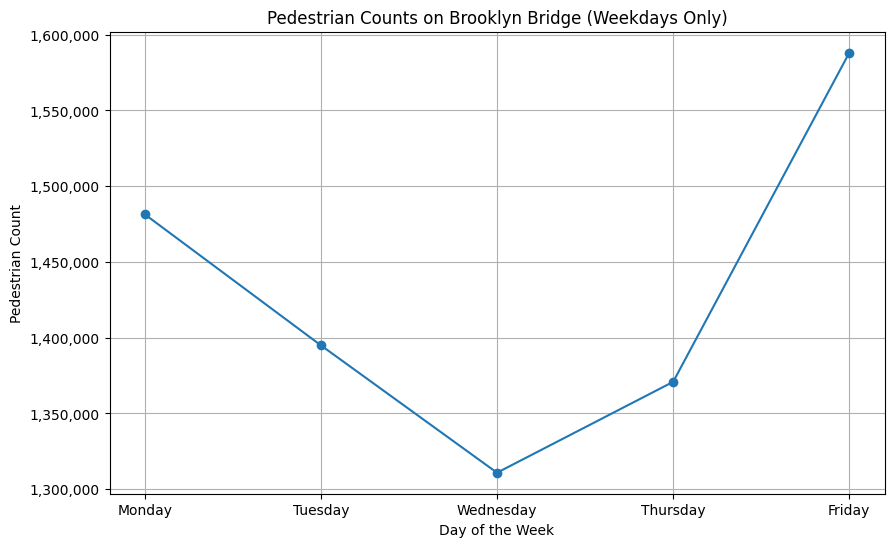

In [20]:
import matplotlib.ticker as mticker

# Convert 'hour_beginning' to datetime format and extract day names
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['DayOfWeek'] = df['hour_beginning'].dt.day_name()

# Filter out Saturday and Sunday
df_weekdays = df[~df['DayOfWeek'].isin(['Saturday', 'Sunday'])]

# Group by day of the week and calculate pedestrian counts
df_weekdays_grouped = df_weekdays.groupby('DayOfWeek')['Pedestrians'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(df_weekdays_grouped.index, df_weekdays_grouped.values, marker='o')

# Format y-axis to show full numbers with commas
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Pedestrian Counts on Brooklyn Bridge (Weekdays Only)')
plt.xlabel('Day of the Week')
plt.ylabel('Pedestrian Count')
plt.grid(True)
plt.show()


In [22]:
# Filter data for the year 2019
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df_2019 = df[df['hour_beginning'].dt.year == 2019]

df.head(10)


,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,DayOfWeek
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Monday
5,2019-12-25 14:00:00,Brooklyn Bridge,3171,1685,1486,clear-day,44.0,0.0000,40.708164,-73.999509,Christmas Day,"(40.7081639691088, -73.9995087014816)",Wednesday
6,2019-01-27 21:00:00,Brooklyn Bridge,13,5,8,partly-cloudy-night,41.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Sunday
7,2019-02-07 04:00:00,Brooklyn Bridge,0,0,0,cloudy,39.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Thursday
8,2019-01-03 21:00:00,Brooklyn Bridge,9,7,2,partly-cloudy-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Thursday
9,2019-08-13 09:00:00,Brooklyn Bridge,520,281,239,partly-cloudy-day,76.0,0.0087,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday


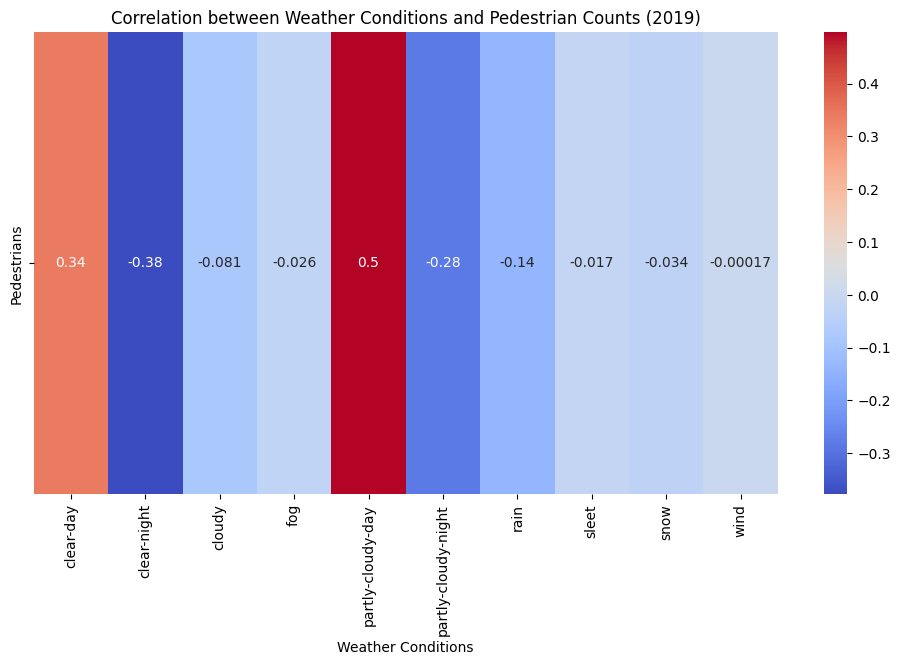

In [40]:
#Q2.
# Filtering data for the year 2019
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df_2019 = df[df['hour_beginning'].dt.year == 2019]

# One-hot encoding the 'weather_summary' column (categorical feature)
df_2019_encoded = pd.get_dummies(df_2019, columns=['weather_summary'])

weather_columns = df_2019_encoded.filter(like='weather_summary').columns
df_weather_pedestrians = df_2019_encoded[['Pedestrians'] + list(weather_columns)]

correlation_matrix = df_weather_pedestrians.corr()

pedestrian_correlation = correlation_matrix.loc['Pedestrians', weather_columns]

pedestrian_correlation.index = pedestrian_correlation.index.str.replace('weather_summary_', '')

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(pedestrian_correlation.to_frame().T, annot=True, cmap='coolwarm', cbar=True,
            yticklabels=['Pedestrians'])
plt.title('Correlation between Weather Conditions and Pedestrian Counts (2019)')
plt.xlabel('Weather Conditions')
plt.show()


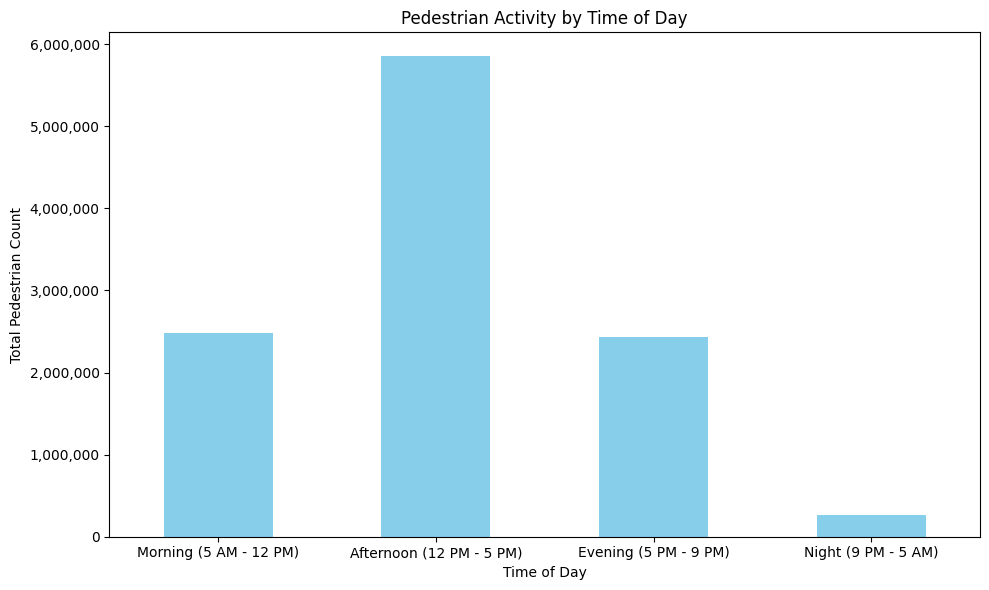

In [47]:
#Q3.
# Sample function to categorize time of day with time frames
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning (5 AM - 12 PM)'
    elif 12 <= hour < 17:
        return 'Afternoon (12 PM - 5 PM)'
    elif 17 <= hour < 21:
        return 'Evening (5 PM - 9 PM)'
    else:
        return 'Night (9 PM - 5 AM)'

df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['Hour'] = df['hour_beginning'].dt.hour
df['TimeOfDay'] = df['Hour'].apply(categorize_time_of_day)

time_of_day_grouped = df.groupby('TimeOfDay')['Pedestrians'].sum()

time_order = ['Morning (5 AM - 12 PM)', 'Afternoon (12 PM - 5 PM)',
              'Evening (5 PM - 9 PM)', 'Night (9 PM - 5 AM)']
time_of_day_grouped = time_of_day_grouped.reindex(time_order)

# Plotting the pedestrian activity based on time of day
plt.figure(figsize=(10, 6))  # Increased figure size for better spacing
ax = time_of_day_grouped.plot(kind='bar', color='skyblue')

ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Pedestrian Activity by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Pedestrian Count')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()
